In [1]:

import pickle
import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import mlflow
from mlflow import log_metric, log_param, log_artifact

from mlem.api import save

In [2]:
# loading datasets
df = pd.read_csv('Titanic Datasets/train.csv')

**Data Understanding**

In [3]:
# Return the first `n` rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Generate descriptive statistics.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# return number of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Return boolean Series denoting duplicate rows.
df.duplicated().sum()

0

In [8]:
# Return a Series containing counts of unique rows in the DataFrame
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# Return a Series containing counts of unique rows in the DataFrame
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Return a Series containing counts of unique rows in the DataFrame
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Data Exploration**

<AxesSubplot:>

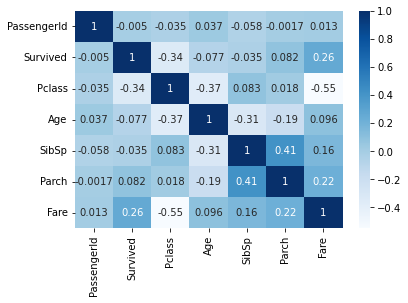

In [11]:
# Compute pairwise correlation of columns
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='Blues')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

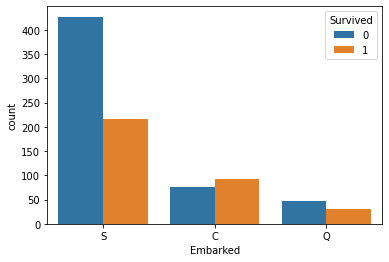

In [12]:
sns.countplot(data=df, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

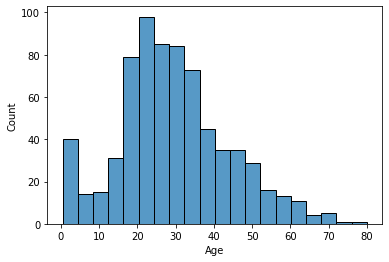

In [13]:
sns.histplot(data=df, x='Age')

<AxesSubplot:xlabel='Survived', ylabel='count'>

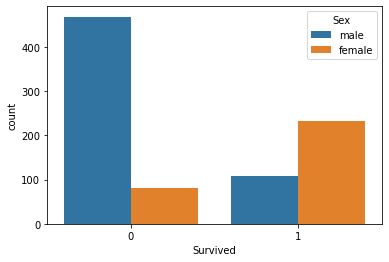

In [14]:
sns.countplot(data=df, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

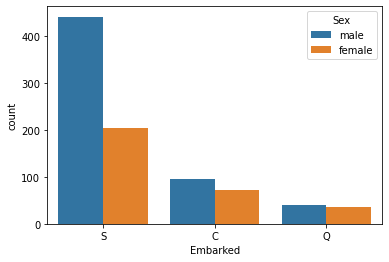

In [15]:
sns.countplot(data=df, x='Embarked', hue='Sex')

In [16]:
# Drop specified labels from columns.
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

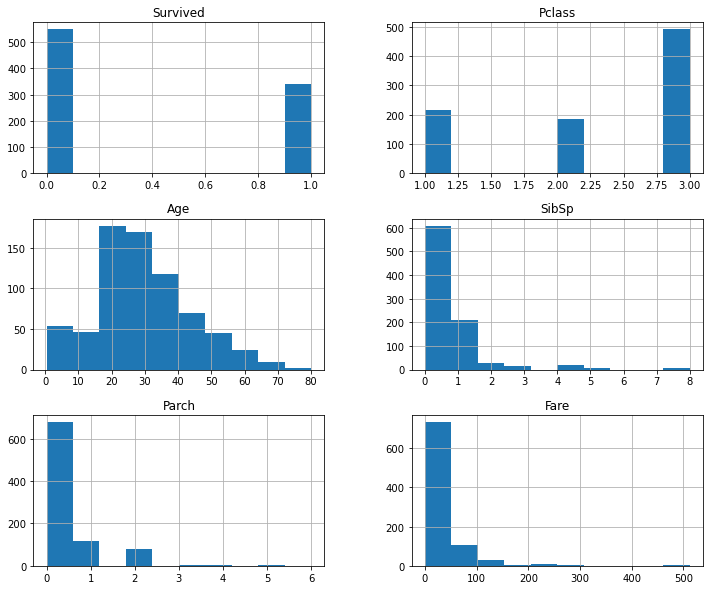

In [17]:
df.hist(figsize=(12, 10))
plt.show()

In [18]:
# assigning Independent variables to X
X = df.drop(['Survived'], axis=1)
# assigning dependent variable y
y = df['Survived']

**Model Development**

In [19]:
# Applies transformers to columns of an array or pandas DataFrame.
transformer = ColumnTransformer([
    ("numeric", make_pipeline(KNNImputer(), KBinsDiscretizer(encode='ordinal', strategy='uniform')), make_column_selector(dtype_exclude='object')),
    ("categorical", make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder()), make_column_selector(dtype_include='object'))
])

In [20]:
# Fit all transformers, transform the data and concatenate results.
x = transformer.fit_transform(X)

In [21]:
# Split arrays or matrices into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=1)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(694, 7)
(197, 7)
(694,)
(197,)


**Predicting Titanic Survivor Using Logistic Regression**

In [23]:
# logging model to mlflow
def train(rf_model, x_train, y_train):
    rf_model = rf_model.fit(x_train, y_train)
    train_acc = rf_model.score(x_train, y_train)
    log_metric("Train Score", train_acc)
    print("Training Accuracy: {:.3f}".format(train_acc))

def evaluate(rf_model, x_test, y_test):
    eval_acc = rf_model.score(x_test, y_test)
    y_hat = rf_model.predict(x_test)

    f1score = f1_score(y_test, y_hat)
    acc = accuracy_score(y_test, y_hat)

    log_metric("F1 Score", f1score)
    log_metric("Model Accuracy", acc)

    print("F1 Score: {:.3f}".format(f1score))
    print("Model Accuracy: {:.3f}".format(acc))

    con_matrix = confusion_matrix(y_test, y_hat)
    ax = sns.heatmap(con_matrix, annot=True, fmt='g')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("RandomForestClassifier Confusion Matrix")
    plt.savefig("rf.png")

    log_artifact("rf.png")

In [24]:
rf_model = RandomForestClassifier(n_estimators=55, criterion='log_loss', max_depth=4, max_features="log2", max_samples=1.0)

Training Accuracy: 0.831
F1 Score: 0.737
Model Accuracy: 0.797
Model run:  67b70e9f0ef146ce89cf1ee819783013


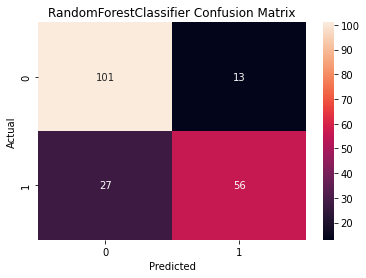

In [25]:
mlflow.set_experiment("Random Forest Classifier.")
with mlflow.start_run():
    train(rf_model, x_train, y_train)
    evaluate(rf_model, x_test, y_test)
    mlflow.sklearn.log_model(rf_model, "log_rf_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

**Predicting Titanic Survivor Using Histogram-based Gradient Boosting Classification Tree.**

In [26]:
# logging model to mlflow
def train(dt_model, x_train, y_train):
    dt_model = dt_model.fit(x_train, y_train)
    train_acc = dt_model.score(x_train, y_train)
    log_metric("Train Score", train_acc)
    print("Training Accuracy: {:.3f}".format(train_acc))

def evaluate(dt_model, x_test, y_test):
    eval_acc = dt_model.score(x_test, y_test)
    y_pred = dt_model.predict(x_test)

    f1score = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    log_metric("F1 Score", f1score)
    log_metric("Model Accuracy", acc)

    print("F1 Score: {:.3f}".format(f1score))
    print("Model Accuracy: {:.3f}".format(acc))

    con_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(con_matrix, annot=True, fmt='g')
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("DecisionTreeClassifier Confusion Matrix")
    plt.savefig("dt.png")

    log_artifact("dt.png")

In [27]:
dt_model = DecisionTreeClassifier(criterion='log_loss', splitter='random',max_depth=2)

Training Accuracy: 0.788
F1 Score: 0.726
Model Accuracy: 0.782
Model run:  8de8b1cd9faa4b0f98160eb3910abbc5


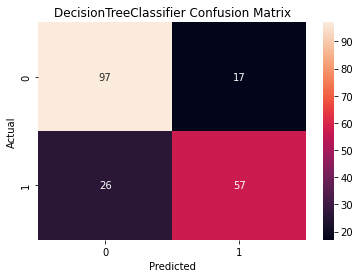

In [28]:
mlflow.set_experiment("Decision Tree Classifier.")
with mlflow.start_run():
    train(dt_model, x_train, y_train)
    evaluate(dt_model, x_test, y_test)
    mlflow.sklearn.log_model(dt_model, "log_dt_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

In [29]:
# Write a pickled representation of obj to the open file object file.
filename = "KaggleTitanic.pkl"

with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)

In [30]:
# Read and return an object from the pickle data stored in a file.
with open(filename, 'rb') as file:
    model = pickle.load(file)

**Loading Unseen Datasets for prediction on Trained Model**

In [31]:
test = pd.read_csv('Titanic Datasets/test.csv')

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
new = test.drop(['PassengerId'], axis=1)
testid = test['PassengerId']

In [34]:
new.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [35]:
new = new.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [36]:
# Applies transformers to columns of an array or pandas DataFrame.
transformer = ColumnTransformer([
    ("numeric", make_pipeline(KNNImputer(), KBinsDiscretizer(encode='ordinal', strategy='uniform')), make_column_selector(dtype_exclude='object')),
    ("categorical", make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder()), make_column_selector(dtype_include="object"))
])

In [37]:
nw = transformer.fit_transform(new)

In [38]:
predictiom = model.predict(nw)

In [39]:
# creating Dataframe
submit = pd.DataFrame(predictiom, columns=['Survived'])
# returns the first 5 row
submit.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [40]:
nel = pd.concat([testid, submit], axis=1)
nel.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
# Write object to a comma-separated values (csv) file
nel.to_csv("submission.csv")

In [42]:
#data = {'Original Data' : y_test, 'Predicted Data' : y_hat}
#dt = pd.DataFrame(data)
#dt.head(20)

In [43]:
#save(
#    rf_model, "rf_model", sample_data=x_train, description="Random Forest Classifier"
#)

#if __name__ == "__main__":
#train(rf_model, x_train, y_train)

In [44]:
#if __name__ == "__main__":
#    evaluate(rf_model, x_train, y_train)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34cd7c36-1fb4-455a-86de-bdf56641191e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>